# Inicio - Evaluación Aprender

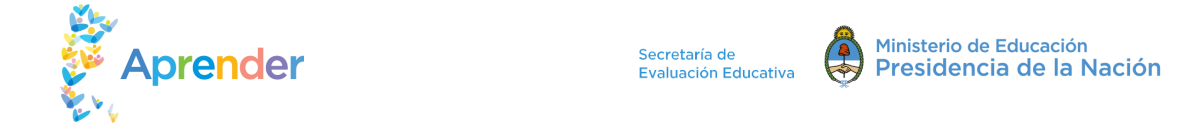

La Evaluación **Aprender** fue implementada por el Ministerio de Educación de la Nación, a través de la Secretaría de Evaluación Educativa, en acuerdo con el Consejo Federal de Educación y con la participación del Cuerpo Colegiado Federal de docentes y especialistas.

Este dataset permite conocer los logros de aprendizaje de las y los estudiantes de nivel primario y secundario en las áreas de conocimiento escolares: Lengua, Matemática, Ciencias Naturales y Ciencias Sociales. También, brindar información de contexto de los estudiantes, directivos y docentes.
Aprender se realiza desde el año 2016 en adelante, es una prueba estandarizada. Esto significa que se aplican los mismos instrumentos a todos/as los/as estudiantes del mismo grado o año, en las mismas condiciones, para luego valorar los resultados con los mismos criterios. Este tipo de evaluación se realiza de acuerdo con normas que garantizan la homogeneidad del proceso evaluativo y de los resultados obtenidos.

---


In [ ]:
#@title Importar datos y librerías

import numpy as np
import pandas as pd
import seaborn as sns
!pip install hvplot -q
import hvplot.pandas
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Descarga el dataset
!wget -q -O "/content/resultados-aprender-resultados_aprender.csv" "https://drive.google.com/uc?id=1gv3RGqfvWOnVAE61RngbJuTxPAO3d80Z"
df = pd.read_csv("/content/resultados-aprender-resultados_aprender.csv")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 28.2 MB/s eta 0:00:00


---
# Exploración

In [ ]:
#@title Visualización inicial del DataSet

df

,nombre_partido,id_partido,año,materia,respondientes,resultado,porcentaje
0,25 DE MAYO,109.0,2016,lengua,427,avanzado,"8,20"
1,25 DE MAYO,109.0,2016,lengua,427,básico,"21,78"
2,25 DE MAYO,109.0,2016,lengua,427,por debajo del nivel básico,"18,97"
3,25 DE MAYO,109.0,2016,lengua,427,satisfactorio,"51,05"
4,9 DE JULIO,77.0,2016,lengua,919,avanzado,"12,19"
...,...,...,...,...,...,...,...
3259,PBA,NaN,2016,lengua,164497,Avanzado,10
3260,PBA,NaN,2016,matemática,164753,Por debajo del nivel básico,40
3261,PBA,NaN,2016,matemática,164753,Básico,29
3262,PBA,NaN,2016,matemática,164753,Satisfactorio,25


In [ ]:
#@title Forma del DataSet

print(f"El Dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El Dataset tiene 3264 filas y 7 columnas.


In [ ]:
#@title Columnas del DataSet

print("Las columnas del Dataset son: \n")
print(df.columns)

Las columnas del Dataset son: 

Index(['nombre_partido', 'id_partido', 'año', 'materia', 'respondientes',
       'resultado', 'porcentaje'],
      dtype='object')


Las columnas representan diferentes aspectos de la Evaluación Aprender. Se incluye nombre de los partidos, año, materia evaluada, número de personas que respondieron, resultados obtenidos y distribución de los respondientes asociado a cada resultado.

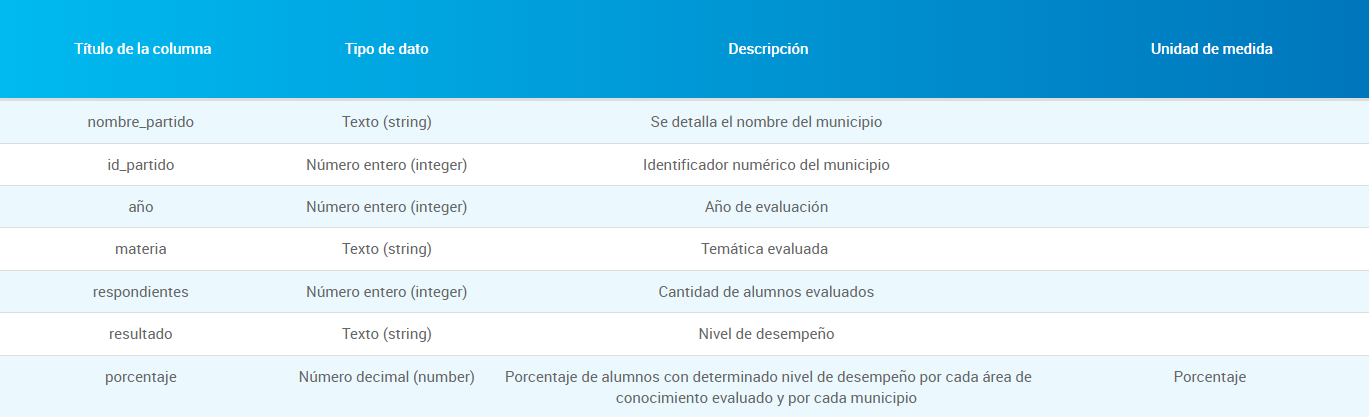

In [ ]:
#@title Tipo de dato de las columnas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3264 entries, 0 to 3263
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nombre_partido  3264 non-null   object 
 1   id_partido      3240 non-null   float64
 2   año             3264 non-null   int64  
 3   materia         3264 non-null   object 
 4   respondientes   3264 non-null   object 
 5   resultado       3264 non-null   object 
 6   porcentaje      3264 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 178.6+ KB


El DataSet contiene una combinación de distintos tipos de datos.

Las columnas "respondientes" y "porcentaje" contienen valores continuos, pero están representados como tipo _object_. Será necesario transformar estas columnas a tipos de datos numéricos para el análisis.

In [ ]:
print("Los nombres de los partidos son:\n", df["nombre_partido"].unique())

Los nombres de los partidos son:
 ['25 DE MAYO' '9 DE JULIO' 'ADOLFO ALSINA' 'ADOLFO GONZALES CHAVES'
 'ALBERTI' 'ALMIRANTE BROWN' 'ARRECIFES' 'AVELLANEDA' 'AYACUCHO' 'AZUL'
 'BAHIA BLANCA' 'BALCARCE' 'BARADERO' 'BENITO JUAREZ' 'BERAZATEGUI'
 'BERISSO' 'BOLIVAR' 'BRAGADO' 'BRANDSEN' 'CAMPANA' 'CAÑUELAS'
 'CAPITAN SARMIENTO' 'CARLOS CASARES' 'CARLOS TEJEDOR' 'CARMEN DE ARECO'
 'CASTELLI' 'CHACABUCO' 'CHASCOMUS' 'CHIVILCOY' 'COLON'
 'CORONEL DE MARINA L ROSALES' 'CORONEL DORREGO' 'CORONEL PRINGLES'
 'CORONEL SUAREZ' 'DAIREAUX' 'DOLORES' 'ENSENADA' 'ESCOBAR'
 'ESTEBAN ECHEVERRIA' 'EXALTACION DE LA CRUZ' 'EZEIZA' 'FLORENCIO VARELA'
 'FLORENTINO AMEGHINO' 'GENERAL ALVARADO' 'GENERAL ALVEAR'
 'GENERAL ARENALES' 'GENERAL BELGRANO' 'GENERAL GUIDO'
 'GENERAL JUAN MADARIAGA' 'GENERAL LA MADRID' 'GENERAL LAS HERAS'
 'GENERAL LAVALLE' 'GENERAL PAZ' 'GENERAL PINTO' 'GENERAL PUEYRREDON'
 'GENERAL RODRIGUEZ' 'GENERAL SAN MARTIN' 'GENERAL VIAMONTE'
 'GENERAL VILLEGAS' 'GUAMINI' 'HIPOLITO YRIGOYEN' 'HU

In [ ]:
print("Las materias son:", df['materia'].unique())

Las materias son: ['lengua' 'matemática' 'ciencias naturales' 'ciencias sociales']


In [ ]:
print("Los años del DataSet son: ", df['año'].unique())

Los años del DataSet son:  [2016 2017]


In [ ]:
print("Los Resultados de las evaluaciones pueden ser: ", df['resultado'].unique())

Los Resultados de las evaluaciones pueden ser:  ['avanzado' 'básico' 'por debajo del nivel básico' 'satisfactorio'
 'Por debajo del nivel básico' 'Básico' 'Satisfactorio' 'Avanzado']


Se deberá unificar las clases de la columna "resultado" en el uso de minúsculas.

In [ ]:
#@title Revisión de valores nulos

df.isnull().sum()

nombre_partido     0
id_partido        24
año                0
materia            0
respondientes      0
resultado          0
porcentaje         0
dtype: int64

Solo la columna "id_partido" contiene valores nulos.

In [ ]:
df.loc[df['id_partido'].isnull(), :]

,nombre_partido,id_partido,año,materia,respondientes,resultado,porcentaje
3240,PBA,NaN,2017,lengua,172385,Por debajo del nivel básico,17
3241,PBA,NaN,2017,lengua,172385,Básico,18
3242,PBA,NaN,2017,lengua,172385,Satisfactorio,46
3243,PBA,NaN,2017,lengua,172385,Avanzado,19
3244,PBA,NaN,2017,matemática,172378,Por debajo del nivel básico,41
3245,PBA,NaN,2017,matemática,172378,Básico,28
3246,PBA,NaN,2017,matemática,172378,Satisfactorio,27
3247,PBA,NaN,2017,matemática,172378,Avanzado,4
3248,PBA,NaN,2017,ciencias naturales,278646,Por debajo del nivel básico,13
3249,PBA,NaN,2017,ciencias naturales,278646,Básico,19


Los valores nulos de "id_partido" se deben a que "PBA" no posee _id_. No obstante, se descartará del análisis esta columna debido a que ya se encuentra representada en "nombre_partido".


In [ ]:
#@title Exploración de la variable objetivo

print(df["porcentaje"].describe(), "\n")
print(df['porcentaje'].head(5))

count     3264
unique    2346
top       0,00
freq        18
Name: porcentaje, dtype: object 

0     8,20
1    21,78
2    18,97
3    51,05
4    12,19
Name: porcentaje, dtype: object


No se muestran las estadísticas descriptivas de la variable objetivo debido a que los decimales se encuentran con coma(,).

Se deberá transformar la coma por punto(.) y cambiar el tipo de dato.

---
# Transformaciones

*   Eliminar "id_partido" : Genera redundancia de
 datos con "nombre_partido" y posee valores nulos.
*   Transfomar la columna "porcentaje" a float: cambiar comas por puntos
*   Transfomar la columna "respondientes" a int: eliminar el punto decimal
*   Unificar valores de la columna "resultado", ya que aparecen en minusculas y mayusculas.

In [ ]:
#@title Eliminar "id_partido"

df.drop(columns="id_partido", inplace=True)

In [ ]:
#@title Transformar "porcentaje" a float

df['porcentaje'] = df['porcentaje'].str.replace(',', '.')
df['porcentaje'] = df['porcentaje'].astype('float')

df['porcentaje'].dtype

dtype('float64')

In [ ]:
#@title Transformar "respondientes" a int

df['respondientes'] = df['respondientes'].str.replace(',', '', regex=True)
df['respondientes'] = df['respondientes'].str.replace('.', '', regex=True)
df['respondientes'] = df['respondientes'].astype('int')

df['respondientes'].dtype

dtype('int64')

Se transforman las comas en puntos de la columna "respondientes" para convertir los valores a un formato numérico reconocido.

In [ ]:
#@title Unificar instancias de "resultado"

df["resultado"] = df["resultado"].str.replace("Por debajo del nivel básico", "por debajo del nivel básico")
df["resultado"] = df["resultado"].str.replace("Básico", "básico")
df["resultado"] = df["resultado"].str.replace("Satisfactorio", "satisfactorio")
df["resultado"] = df["resultado"].str.replace("Avanzado", "avanzado")

df["resultado"].unique()

array(['avanzado', 'básico', 'por debajo del nivel básico',
       'satisfactorio'], dtype=object)

Las clases de la variable "resultado" se unificaron en 4 instancias únicas.

In [ ]:
#@title Agregar columna "cantidad_respondientes"

df['cantidad_respondientes'] = (df['respondientes'] * df['porcentaje'] / 100 ).astype(int)
df

,nombre_partido,año,materia,respondientes,resultado,porcentaje,cantidad_respondientes
0,25 DE MAYO,2016,lengua,427,avanzado,8.20,35
1,25 DE MAYO,2016,lengua,427,básico,21.78,93
2,25 DE MAYO,2016,lengua,427,por debajo del nivel básico,18.97,81
3,25 DE MAYO,2016,lengua,427,satisfactorio,51.05,217
4,9 DE JULIO,2016,lengua,919,avanzado,12.19,112
...,...,...,...,...,...,...,...
3259,PBA,2016,lengua,164497,avanzado,10.00,16449
3260,PBA,2016,matemática,164753,por debajo del nivel básico,40.00,65901
3261,PBA,2016,matemática,164753,básico,29.00,47778
3262,PBA,2016,matemática,164753,satisfactorio,25.00,41188


---
# Análisis uni-variado

In [ ]:
#@title Distribución de "nombre_partido"

df["nombre_partido"].value_counts().sort_values(ascending=True)

25 DE MAYO                24
ADOLFO GONZALES CHAVES    24
ALBERTI                   24
ALMIRANTE BROWN           24
ARRECIFES                 24
                          ..
TORDILLO                  24
TIGRE                     24
TAPALQUE                  24
TRES DE FEBRERO           24
PBA                       24
Name: nombre_partido, Length: 136, dtype: int64

La distribución de la columna "nombre_partido" muestra que existen 136 partidos diferentes en el conjunto de datos.
Cada partido tiene 24 registros asociados en el dataset.

Esta igualdad en la cantidad de registros sugiere que los datos están distribuidos uniformemente entre los distintos partidos.

2017    2176
2016    1088
Name: año, dtype: int64 



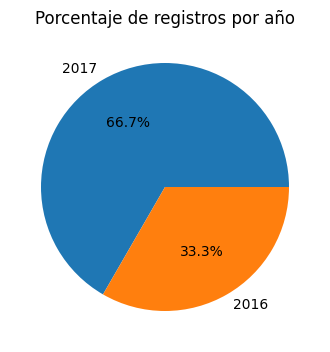

In [ ]:
#@title Porcentaje de registros por "año"

print(df['año'].value_counts(), "\n")

# Crear el gráfico circular
plt.figure(figsize=(4, 6))
plt.pie(df['año'].value_counts().values, labels=df['año'].value_counts().index, autopct='%1.1f%%')

# Título
plt.title('Porcentaje de registros por año')

# Mostrar el gráfico
plt.show()

En el conjunto de datos hay 2176 registros para el año 2017 y 1088 registros para el año 2016.

Se representa visualmente la proporción de registros correspondientes a cada año en relación al total. En este caso, el 2017 constituye el 66.7% de los registros, mientras que el 2016 representa del 33.3%. Esto indica una diferencia significativa en la distribución de datos entre los dos años.

lengua                1088
matemática            1088
ciencias naturales     544
ciencias sociales      544
Name: materia, dtype: int64 



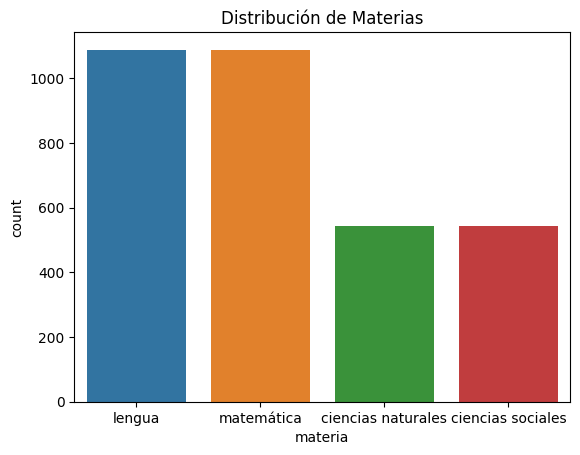

In [ ]:
#@title Distribución de registros por "materia"

print(df['materia'].value_counts(), "\n")

sns.countplot(data=df, x='materia')
plt.title("Distribución de Materias")

plt.show()

Tanto 'Lengua' como 'Matemática' tienen 1088 registros, mientras que 'Ciencias Naturales' y 'Ciencias Sociales' tienen la mitad.


Esto se debe a que en el año 2016 se evaluaron las asignaturas Matemática y Lengua y en el año 2017 Matemática, Lengua, Ciencias Naturales y Ciencias Sociales.

Las materias son diferentes en dificultad para los estudiantes, la diferencia en la cantidad de registros podría hacer que el modelo tenga mejor rendimiento para predecir el porcentaje de 'lengua' y 'matemática'.

avanzado                       816
básico                         816
por debajo del nivel básico    816
satisfactorio                  816
Name: resultado, dtype: int64 



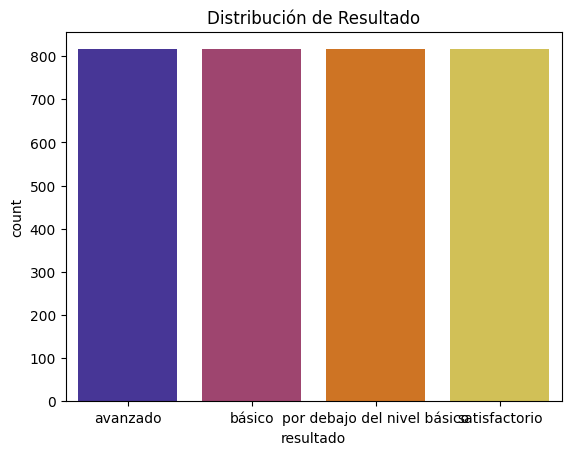

In [ ]:
#@title Distribución de registros por "resultado"

print(df['resultado'].value_counts(), "\n")

sns.countplot(data=df, x='resultado', palette='CMRmap')
plt.title("Distribución de Resultado")

plt.show()

count       3264.00
mean      122335.45
std       237851.81
min           24.00
25%         7506.75
50%        28662.50
75%        94359.50
max      2165151.00
Name: respondientes, dtype: float64 



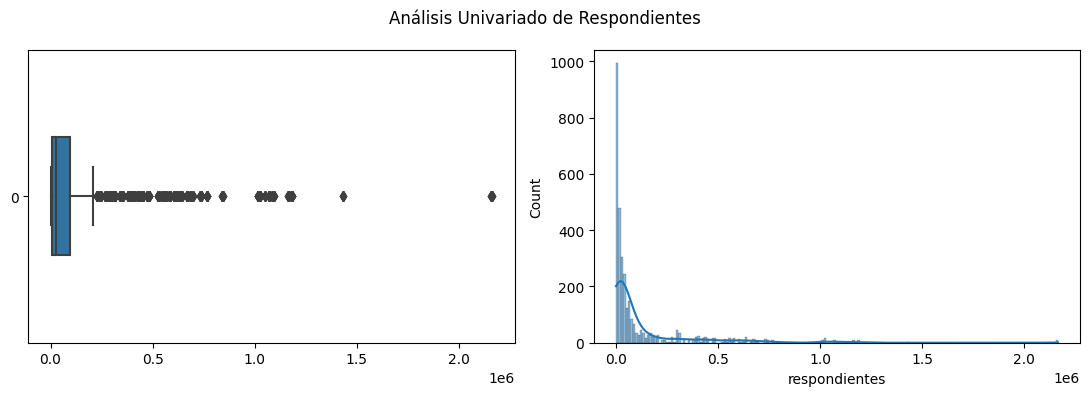

In [ ]:
#@title Análisis de "respondientes"

print(df['respondientes'].describe().round(2), "\n")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)
# Plotea el boxplot
sns.boxplot(data=df['respondientes'], ax=ax[0], orient='h', width=0.4)
# Plotea la curva de densidad
sns.histplot(data=df['respondientes'], ax=ax[1], kde=True, fill=True)

fig.suptitle('Análisis Univariado de Respondientes')

plt.tight_layout()

# 1e6 = 1.000.000 (seis ceros)

El rango de valores que toma "respondientes" es de 24 a 2165151 y muy grande considerando que la media es de 122335.45.

Visualmente los valores se concentran alrededor de la media y luego se extienden valores extremos.


count       3264.00
mean       30582.34
std        68648.51
min            0.00
25%         1155.50
50%         6336.00
75%        22768.50
max      1065483.00
Name: cantidad_respondientes, dtype: float64 



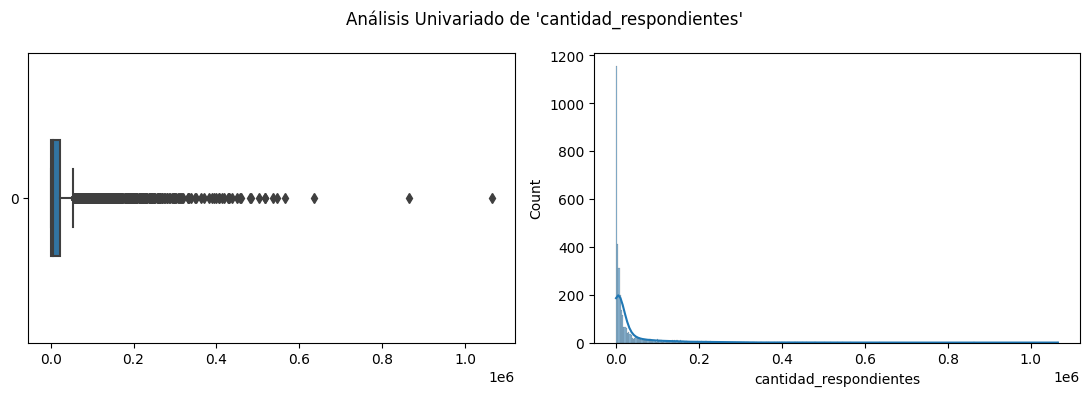

In [ ]:
#@title Análisis de "cantidad_respondientes"

print(df['cantidad_respondientes'].describe().round(2), "\n")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)
# Plotea el boxplot
sns.boxplot(data=df['cantidad_respondientes'], ax=ax[0], orient='h', width=0.4)
# Plotea la curva de densidad
sns.histplot(data=df['cantidad_respondientes'], ax=ax[1], kde=True, fill=True)

fig.suptitle("Análisis Univariado de 'cantidad_respondientes'")

plt.tight_layout()

count    3264.00
mean       25.00
std        13.70
min         0.00
25%        14.96
50%        22.88
75%        34.88
max        67.57
Name: porcentaje, dtype: float64 



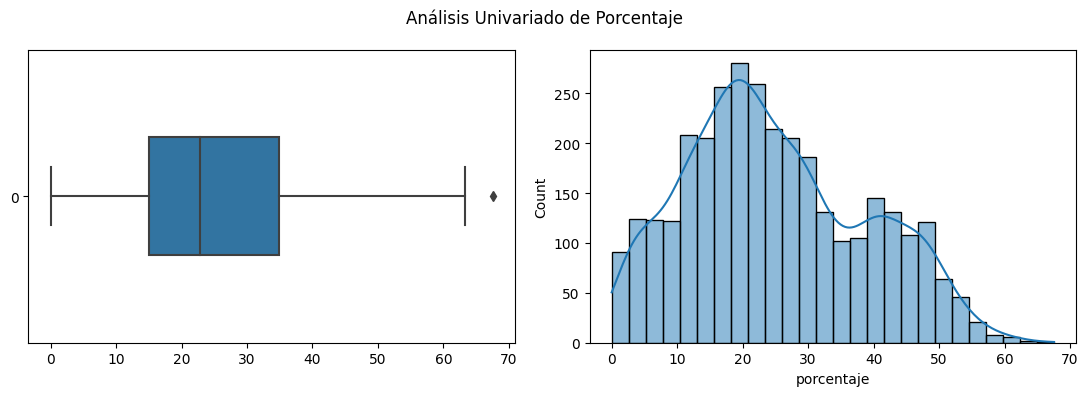

In [ ]:
#@title Análisis de "porcentaje"

print(df['porcentaje'].describe().round(2), "\n")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)
# Plotea el boxplot
sns.boxplot(data=df['porcentaje'], ax=ax[0], orient='h', width=0.4)
# Plotea la curva de densidad
sns.histplot(data=df['porcentaje'], ax=ax[1], kde=True, fill=True)

fig.suptitle('Análisis Univariado de Porcentaje')

plt.tight_layout()

Las evaluaciones Aprender tuvieron en promedio 30582 respondientes en cada 'resultado'.

El rango de valores que toma "porcentaje" es de 0 hasta el %67.
Si bien la media es 25 también se aprecia una concentración en los valores cercanos al 40.

---
# Análisis multi-variado

Text(0.5, 1.0, 'Dispersión del porcentaje por resultado')

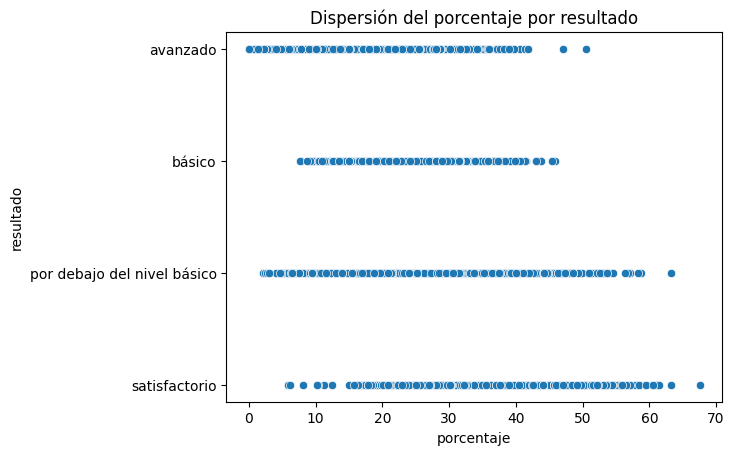

In [ ]:
#@title El "porcentaje" según los "resultados"

sns.scatterplot(data=df, x="porcentaje", y="resultado")
plt.title("Dispersión del porcentaje por resultado")

'por debajo del nivel básico' es la etiqueta que tiene el mayor rango de porcentaje y 'avanzado' se concentra entre 0 y 40.

Text(0.5, 1.0, "Las 'materias' según la 'cantidad_respondientes'")

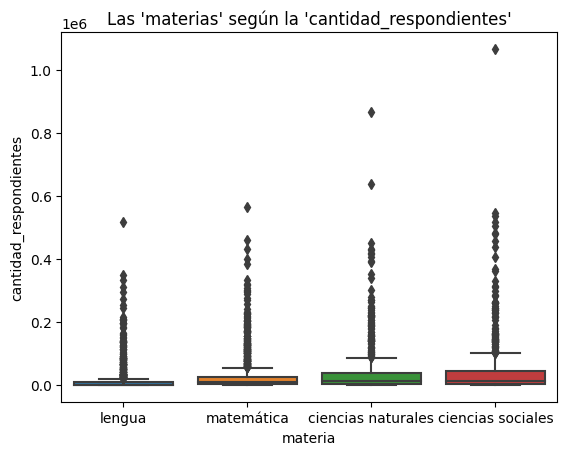

In [ ]:
#@title Las "materias" según los "respondientes"

sns.boxplot(data=df, x="materia", y="cantidad_respondientes")
plt.title("cantidad_respondientes por materia")

'ciencias naturales' y 'ciencias sociales' tienen diferencias mínimas en cantidad de 'respondientes'.
'lengua' es la materia menos evaluada, junto con 'matemática'.

                             cantidad_respondientes
resultado                                          
avanzado                                   16149520
básico                                     22678271
por debajo del nivel básico                22888836
satisfactorio                              38104147 



Text(0.5, 1.0, "cantidad_respondientes por resultado'")

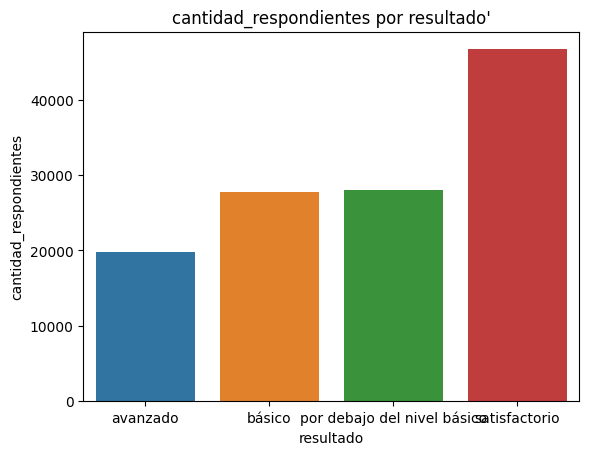

In [ ]:
print(df.groupby('resultado')[['cantidad_respondientes']].sum(), "\n")
sns.barplot(x='resultado', y='cantidad_respondientes', data=df, errorbar=None)
plt.title("cantidad_respondientes por resultado'")

---
# Correlación


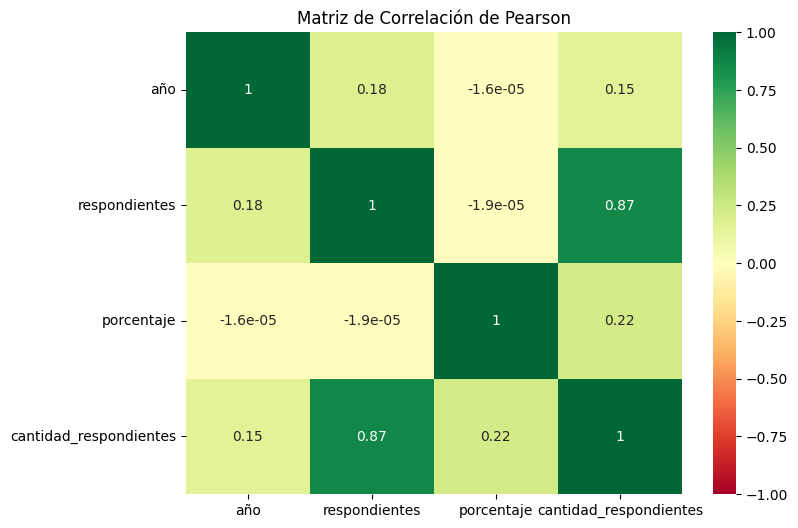

In [ ]:
# Crear un mapa de calor

df_corr = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Matriz de Correlación de Pearson")
plt.show()

Las variables continuas del DasaSet tienen una correlación baja con respecto a la variable objetivo. La única variable con buena correlación es 'cantidad_respondientes' ya que surge de un cálculo con la propia variable objetivo.

El modelo de Regresión Lineal necesita de una dependencia entre la variable objetivo y cada variable de entrada. Esta falta de linealidad podría perjudicar al modelo.

---
# Modelo


La **Regresión Lineal** es un algoritmo de aprendizaje supervisado que se utiliza para predecir el valor de una variable continua, denominada variable dependiente, en función de una o más variables independientes.

In [ ]:
#@title Selección de variables de entrada

X = df[[
    'nombre_partido',
    'año',
    'materia',
    'respondientes',
    'resultado',
    'cantidad_respondientes'
]]
Y = df['porcentaje']

with pd.option_context('mode.chained_assignment', None):
    # Inicializar el label encoder
    le = LabelEncoder()
    # Aplicar el label encoder
    for col in X.columns:
        if not pd.api.types.is_numeric_dtype(X[col]):
            X[col] = le.fit_transform(X[col])

Se aplica el LabelEncoder para transformar las columnas categóricas de las variables predictoras en valores numéricos y asegurar la ejecución del modelo.

In [ ]:
#@title Particionamiento

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Test: %30 | Entrenamiento: %70

In [ ]:
#@title Configuración y entrenamiento del modelo

modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, Y_train)

LinearRegression()

Se aplica el modelo de Regresión Lineal con la partición de entrenamiento.

La Regresión Lineal se utiliza para modelar la relación entre las características proporcionadas y la variable objetivo continua.

In [ ]:
#@title Predicción

Y_pred = modelo_regresion.predict(X_test)

Se aplica la predicción con la partición de prueba para evaluar el rendimiento del modelo.


# Evaluación del modelo

In [ ]:
print("Los coeficientes son: ", modelo_regresion.coef_)

Los coeficientes son:  [-2.02238794e-04 -4.47187723e-01 -2.22142538e-01 -2.82963678e-05
  6.83070768e+00  1.15174724e-04]


Los coeficientes indican la relación y la importancia relativa de cada característica en la predicción de la variable objetivo.

Los coeficientes más altos en valor absoluto representan una mayor influencia en las predicciones del modelo.

In [ ]:
test_residual= Y_test - Y_pred

Se realiza el test residual para evaluar la calidad del modelo, ya que proporcionan información sobre la magnitud y dirección de los errores en las predicciones.

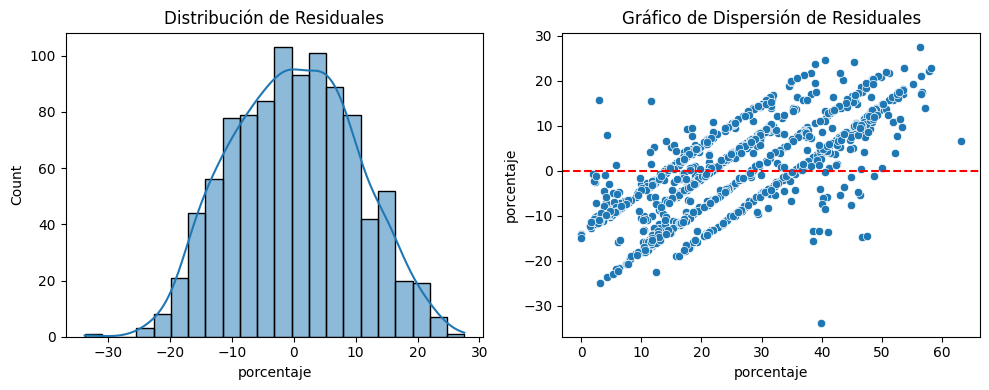

In [ ]:
# Crear los subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 fila, 2 columnas

# Gráfico 1
sns.histplot(test_residual, kde=True, ax=axs[0])
axs[0].set_title('Distribución de Residuales')

# Gráfico 2
sns.scatterplot(x=Y_test, y=test_residual, ax=axs[1])
axs[1].axhline(y=0, color='r', ls='--')
axs[1].set_title('Gráfico de Dispersión de Residuales')

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

El histograma de residuos muestra que la distribución de los residuos es aproximadamente normal. Esto es un buen indicador de que el modelo de regresión lineal es adecuado para los datos.

Sin embargo, el gráfico de dispersión muestra los residuos agrupados en 4 líneas y se esperaba una dispersión aleatoria.



In [ ]:
MAE= metrics.mean_absolute_error(Y_test, Y_pred)    #Mean Absolute Error: Error medio absoluto
MSE=metrics.mean_squared_error(Y_test, Y_pred)      #Mean Squared Error: Error cuadrático medio
RMSE= np.sqrt(MSE)                                  #Root Mean Squared Error: Raíz del error cuadrático medio
r2 = r2_score(Y_test, Y_pred)

In [ ]:
print("Promedio:", round(df['porcentaje'].mean(),2))
print("MAE:\t ", MAE.round(2))
print("MSE:\t ", MSE.round(2))
print("RMSE:\t ", RMSE.round(2))
print("r2:\t ", round(r2, 2))

Promedio: 25.0
MAE:	  8.21
MSE:	  99.45
RMSE:	  9.97
r2:	  0.45


---

# Conclusión
El modelo de regresión lineal no tuvo un rendimiento aceptable. El MSE de 99.45 es alto y significa que el modelo tiende a cometer errores grandes en algunos casos. El RMSE de 9,97 es una medida más precisa del error del modelo, y es cercano al MAE.

El MAE de 8,21 es un buen resultado, ya que es menor que la desviación estándar de la variable objetivo(13,7). Esto significa que, en promedio, las predicciones del modelo están a menos de 8,21 unidades de los valores reales. Pero si se dimenciona que el rango de valores de la variable objetivo va desde 0 hasta 67,57 el MAE podría considerarse alto.

El R² de 0,45 indica que el modelo explica solamente el 45% de la variabilidad de la variable objetivo. Si bien no es muy alto en algunos campos se espera completamente que los valores del R-cuadrado sean bajos. Por ejemplo, cualquier disciplina que intenta predecir el comportamiento humano, como la psicología, normalmente tiene valores del R-cuadrado inferiores al 50%. Los seres humanos son simplemente más difíciles de predecir que, por ejemplo, los procesos físicos.

El gráfico de dispersión es el indicador para sostener que el modelo necesita de mayor dimensionalidad. La agrupación de los residuos indica una falta de linealidad entre las variables de entrada y la variable objetivo. En realidad, el modelo tendrá un mejor rendimiento no solo con variables continuas, sino también con entradas que mejoren el contexto del registro en sí.

En conclusión, se deberá presentar mas información para mejorar los resultados del modelo: se necesita mayor dimensionalidad. Además de aumentar la cantidad de registros es necesario aportar mayor calidad de variables predictoras para evaluar su correlación con la variable objetivo.


Se sugiere:

1. Presentar los datos "desgranados" y no como porcentajes: esto generaría mayor cantidad de registros para nutrir las particiones de entrenamiento y prueba.
3. Cambiar la variable objetivo: una vez que la información esté desagrupada se debe optar por otra variable objetivo que explique mejor el rendimiento académico de un alumno, una institución, o un partido.
2. Mejorar la calidad de las variables de entrada: se necesita variables que esten estrechamente relacionadas con la variable objetivo. Para el análisis del rendimiento acádemico se recomienda:
    * Horas de Estudio
    * Horas de Sueño
    * Notas Previas
    * Actividades Extracurriculares (si/no)
---
